<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Корреляционный-анализ-данных" data-toc-modified-id="Корреляционный-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Корреляционный анализ данных</a></span></li><li><span><a href="#Создание-новых-признаков" data-toc-modified-id="Создание-новых-признаков-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Создание новых признаков</a></span></li><li><span><a href="#Подготовка-данных-к-построению-модели" data-toc-modified-id="Подготовка-данных-к-построению-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Подготовка данных к построению модели</a></span></li><li><span><a href="#Построение-простой-модели-нейронной-сети---baseline" data-toc-modified-id="Построение-простой-модели-нейронной-сети---baseline-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Построение простой модели нейронной сети - baseline</a></span></li><li><span><a href="#Улучшение-нейросети" data-toc-modified-id="Улучшение-нейросети-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Улучшение нейросети</a></span></li><li><span><a href="#Отчёт-по-исследованию" data-toc-modified-id="Отчёт-по-исследованию-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Отчёт по исследованию</a></span></li></ul></div>

# Проект: Прогнозирование температуры звезды

Описание проекта: обсерватория "Небо на ладони" поставила задачу разработать нейронную сеть, которая поможет предсказывать абсолютную температуру на поверхности звезды.

Обычно для расчёта температуры учёные пользуются следующими методами:
- закон смещения Вина;
- закон Стефана-Больцмана;
- спектральный анализ.
Каждый из них имеет плюсы и минусы. Обсерватория хочет внедрить технологии машинного обучения для предсказания температуры звёзд, надеясь, что этот метод будет наиболее точным и удобным.

Характеристики звёзд.
- `относительная светимость L/Lo` — светимость звезды относительно Солнца;
- `относительный радиус R/Ro` — радиус звезды относительно радиуса Солнца;
- `абсолютная звёздная величина Mv` — физическая величина, характеризующая блеск звезды;
- `звёздный цвет (white, red, blue, yellow, yellow-orange и др.)` — цвет звезды, который определяют на основе спектрального анализа;
- `тип звезды и соответствующий ему номер`:
  - Коричневый карлик,	0
  - Красный карлик,	1
  - Белый карлик,	2
  - Звёзды главной последовательности,	3
  - Сверхгигант,	4
  - Гипергигант,	5;
- `абсолютная температура T(K)` — температура на поверхности звезды в Кельвинах <b>(целевой признак)</b>.

Справочная информация:
Светимость Солнца: Lo = 3.828⋅10е26 Вт
Радиус Солнца: Ro = 6.9551⋅10е8 м

## Загрузка данных

Загрузим необходимые библиотеки:

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
# для Jupyter Notebook:
#! pip install matplotlib==3.7.1 -q
#! pip install -U scikit-learn -q
!pip install --upgrade scikit-learn

In [3]:
import pandas as pd
import numpy as np
import phik
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
# для Jupyter Notebook:
import os
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [4]:
RANDOM_STATE = 1897
TEST_SIZE = 0.25

In [5]:
# для Jupyter Notebook:
path_1 = '6_class.csv'
path_2 = '/datasets/6_class.csv'

if os.path.exists(path_1):
    stars = pd.read_csv(path_1)
elif os.path.exists(path_2):
    stars = pd.read_csv(path_2)
else:
    print('Something is wrong!')

In [6]:
# Для Google Colab
# загрузка файла данных из GD:
#! gdown 1HMTNHWm4_Ol8bM3EY2NvW-64bmCldOwr -q

In [7]:
# Для Google Colab
#stars = pd.read_csv('/content/6_class.csv')

Проверим, что данные загрузились корректно:

In [8]:
# настройка для вывода всех столбцов в датасете:
pd.set_option('display.max_columns', None)

In [9]:
# функция для получения информации о датасете
def get_info(dataset):
    print('Первые пять строк датасета:')
    display(dataset.head())
    print('Общая информация:')
    dataset.info()

In [10]:
get_info(stars)

Первые пять строк датасета:


,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,0,3068,0.002400,0.1700,16.12,0,Red
1,1,3042,0.000500,0.1542,16.60,0,Red
2,2,2600,0.000300,0.1020,18.70,0,Red
3,3,2800,0.000200,0.1600,16.65,0,Red
4,4,1939,0.000138,0.1030,20.06,0,Red


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              240 non-null    int64  
 1   Temperature (K)         240 non-null    int64  
 2   Luminosity(L/Lo)        240 non-null    float64
 3   Radius(R/Ro)            240 non-null    float64
 4   Absolute magnitude(Mv)  240 non-null    float64
 5   Star type               240 non-null    int64  
 6   Star color              240 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 13.2+ KB


Столбец `Unnamed` не несёт в себе никакой информации, лишь повторяя индексацию. Удалим его сразу, чтобы не путаться в дальнейшем:

In [11]:
stars = stars.drop('Unnamed: 0', axis=1)

Приведём к единому виду названия столбцов (snake_case, строчные буквы):

In [12]:
stars = stars.rename(columns={
  'Temperature (K)': 'temperature, K',
  'Luminosity(L/Lo)': 'luminosity, L/Lo',
  'Radius(R/Ro)': 'radius, R/Ro',
  'Absolute magnitude(Mv)': 'absolute_magnitude, Mv',
  'Star type': 'star_type',
  'Star color': 'star_color'
})

In [13]:
# Проверим, что все изменения выполнены корректно:
get_info(stars)

Первые пять строк датасета:


,"temperature, K","luminosity, L/Lo","radius, R/Ro","absolute_magnitude, Mv",star_type,star_color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temperature, K          240 non-null    int64  
 1   luminosity, L/Lo        240 non-null    float64
 2   radius, R/Ro            240 non-null    float64
 3   absolute_magnitude, Mv  240 non-null    float64
 4   star_type               240 non-null    int64  
 5   star_color              240 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 11.4+ KB


Выводы по разделу:

- изучили данные из предоставленного датасета, привели названия столбцов к единому виду (snake_case, строчные буквы);
- удалили столбец `Unnamed`, дублирующий индексы;
- типы данных соответствуют их значениям.

Переходим к этапу предобработки данных.

## Предобработка данных

На всякий случай, проверим датасет на наличие пропусков и явных дубликатов:

In [14]:
def data_check(dataset):
    print("\nПроверка на наличие пропусков в датасете\n")
    null = dataset.isnull().sum()
    if null.sum() > 0:
            print("Пропущенные значения в датасете:\n")
            print(null)
    else:
        print("Отсутствуют пропущенные значения в датасете\n")

    print("\nПроверка на наличие явных дубликатов в датасете\n")
    duplicates = dataset.duplicated().sum()
    if duplicates > 0:
        print(f"Количество явных дубликатов в датасете: {duplicates}")
    else:
        print("Отсутствуют явные дубликаты в датасете")

In [15]:
data_check(stars)


Проверка на наличие пропусков в датасете

Отсутствуют пропущенные значения в датасете


Проверка на наличие явных дубликатов в датасете

Отсутствуют явные дубликаты в датасете


Посмотрим на уникальные значения категориального признака `star_color`:

In [16]:
stars['star_color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [17]:
unique_colors = stars['star_color'].unique()
unique_colors_sorted = pd.Series(unique_colors).sort_values().tolist()
unique_colors_sorted

['Blue',
 'Blue ',
 'Blue White',
 'Blue white',
 'Blue white ',
 'Blue-White',
 'Blue-white',
 'Orange',
 'Orange-Red',
 'Pale yellow orange',
 'Red',
 'White',
 'White-Yellow',
 'Whitish',
 'Yellowish',
 'Yellowish White',
 'white',
 'yellow-white',
 'yellowish']

Список содержит одинаковые цвета, записанные по-разному. Упорядочим его, воспользовавшись Гарвадской классификацией, согласно которой принято различать следующие цвета звезд:

- голубой
- бело-голубой
- белый
- жёлто-белый
- жёлтый
- оранжевый
- красный.

Далее проверим, сколько звёзд каждого цвета есть в нашем датасете

In [18]:
stars['star_color'] = stars['star_color'].replace('Blue', 'blue')
stars['star_color'] = stars['star_color'].replace('Blue ', 'blue')

stars['star_color'] = stars['star_color'].replace('Blue White', 'blue-white')
stars['star_color'] = stars['star_color'].replace('Blue white', 'blue-white')
stars['star_color'] = stars['star_color'].replace('Blue white ', 'blue-white')
stars['star_color'] = stars['star_color'].replace('Blue-White', 'blue-white')
stars['star_color'] = stars['star_color'].replace('Blue-white', 'blue-white')

stars['star_color'] = stars['star_color'].replace('Orange', 'orange')
# оранжево-красный цвет отнесём к оранжевому
stars['star_color'] = stars['star_color'].replace('Orange-Red', 'orange')

# бледно-жёлто-оранжевый цвет отнесём к жёлтому
stars['star_color'] = stars['star_color'].replace('Pale yellow orange', \
                                                  'yellow')
stars['star_color'] = stars['star_color'].replace('Yellowish', 'yellow')
stars['star_color'] = stars['star_color'].replace('yellowish', 'yellow')

stars['star_color'] = stars['star_color'].replace('Yellowish White', \
                                                  'yellow-white')
stars['star_color'] = stars['star_color'].replace('White-Yellow', \
                                                  'yellow-white')

stars['star_color'] = stars['star_color'].replace('White', 'white')
stars['star_color'] = stars['star_color'].replace('Whitish', 'white')

stars['star_color'] = stars['star_color'].replace('Red', 'red')

In [19]:
stars['star_color'].unique()

array(['red', 'blue-white', 'white', 'yellow-white', 'yellow', 'blue',
       'orange'], dtype=object)

In [20]:
stars['star_color'].value_counts()

red             112
blue             56
blue-white       41
yellow-white     12
white            12
yellow            4
orange            3
Name: star_color, dtype: int64

Благодаря корректировке, получили 7 табличных значений цветов звёзд вместо 19. В выборке больше всего звёзд красного цвета, совсем немного жёлтого и оранжевого. Объединим их в одну категорию `other`:

In [21]:
stars['star_color'] = stars['star_color'].replace('yellow', 'other')
stars['star_color'] = stars['star_color'].replace('orange', 'other')
stars['star_color'].value_counts()

red             112
blue             56
blue-white       41
yellow-white     12
white            12
other             7
Name: star_color, dtype: int64

Посмотрим на уникальные значения признака `star_type`:

In [22]:
stars['star_type'].unique()

array([0, 1, 2, 3, 4, 5])

Согласно табличным данным в описании задачи, типов звёзд может быть 6 (от 0 до 5), в нашем случае всё верно

Посмотрим, как количественно распределены в датасете звёзды по их типу:

In [23]:
stars['star_type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: star_type, dtype: int64

Распределение - ровно пропорциональное, по 40 звёзд каждого из шести типов.

Выводы по разделу:

- проверили датасет на наличие пропущенных значений, явных дубликатов. И те, и те отсутствут;
- обнаружили одинаковые цвета звёзд, записанные по-разному, привели их к единому виду (заодно изменив написание на строчное). Больше всего звёзд в выборке - красного цвета (112 из 240);
- типов звёзд 6, как в табличных данных в описании задачи, распределены равномерно - по 40 штук каждого типа.

Переходим к исследовательскому анализу данных.

## Исследовательский анализ данных

Изучим статистические данные количественных признаков датасета:

In [24]:
stars.describe().round(2)

,"temperature, K","luminosity, L/Lo","radius, R/Ro","absolute_magnitude, Mv",star_type
count,240.00,240.00,240.00,240.00,240.00
mean,10497.46,107188.36,237.16,4.38,2.50
std,9552.43,179432.24,517.16,10.53,1.71
min,1939.00,0.00,0.01,-11.92,0.00
25%,3344.25,0.00,0.10,-6.23,1.00
50%,5776.00,0.07,0.76,8.31,2.50
75%,15055.50,198050.00,42.75,13.70,4.00
max,40000.00,849420.00,1948.50,20.06,5.00


Посмотрим на доли выбросов в количественных столбцах:

In [25]:
def outliers(dataset, column):
    q1 = dataset[column].quantile(0.25) # первый квартиль
    q3 = dataset[column].quantile(0.75)  # третий квартиль
    iqr = q3 - q1  # межквартильный размах
    quant1 = q1 - 1.5*iqr  # нижняя граница выбросов
    quant3 = q3 + 1.5*iqr  # верхняя граница выбросов
    total = dataset.shape[0]  # общее количество строк в датафрейме
    emission = dataset[(dataset[column] < quant1) | \
     (dataset[column] > quant3)].shape[0]
    # количество выбросов
    emission_quant = (emission / total) * 100  # доля выбросов в столбце
    return np.round((emission_quant), decimals=2)
    # возвращаем долю выбросов в столбце

In [26]:
dataset = stars
column_list = ['temperature, K', 'luminosity, L/Lo', 'radius, R/Ro', \
        'absolute_magnitude, Mv']
for value in column_list:
    print(f'Доля выбросов в {value}, в процентах: {outliers(dataset, value)}')

Доля выбросов в temperature, K, в процентах: 4.58
Доля выбросов в luminosity, L/Lo, в процентах: 5.0
Доля выбросов в radius, R/Ro, в процентах: 16.67
Доля выбросов в absolute_magnitude, Mv, в процентах: 0.0


Доли выбросов незначительные везде, кроме столбца `radius, R/Ro`. Отобразим данные на гистограммах и диаграммах:

In [27]:
# Гистограмма распределения количественных признаков
def histogram(dataset, column):
    dataset[column].plot(kind='hist', bins=20, grid=True, \
                figsize=(5, 5), title=(f'Распределение признака "{column}"'))
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.show()
    return None

# Диаграмма размаха
def whiskers(dataset, column):
    dataset.boxplot(column, figsize=(5, 5))
    plt.title(f'Диаграмма размаха признака "{column}"')
    plt.ylabel('Количество')
    plt.show()
    print(dataset[column].describe().round(2))
    return None

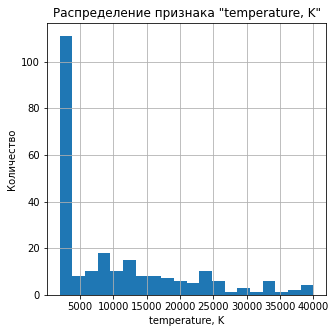

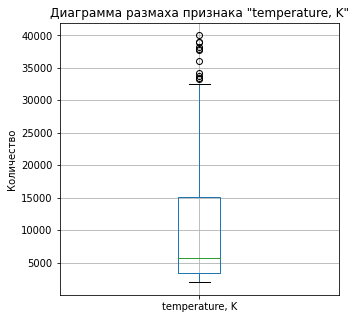

count      240.00
mean     10497.46
std       9552.43
min       1939.00
25%       3344.25
50%       5776.00
75%      15055.50
max      40000.00
Name: temperature, K, dtype: float64


In [28]:
histogram(stars, 'temperature, K')
whiskers(stars, 'temperature, K')

In [29]:
print(round(stars[stars['temperature, K'] < 3800].shape[0] /
            stars.shape[0] * 100, 2))

45.42


Интересно, что почти 45% данных по температуре - для звёзд холоднее, чем 3800К. Согласно табличным данным, это красный цвет. Проверим далее на столбчатой диаграмме процентное соотношение звёзд в выборке именно этого цвета

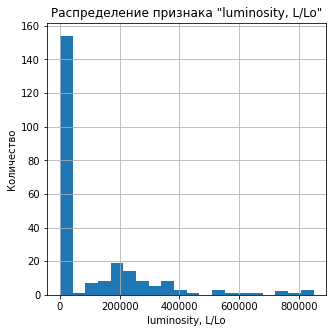

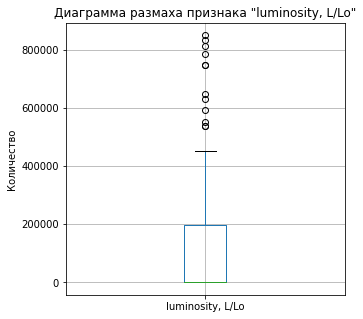

count       240.00
mean     107188.36
std      179432.24
min           0.00
25%           0.00
50%           0.07
75%      198050.00
max      849420.00
Name: luminosity, L/Lo, dtype: float64


In [30]:
histogram(stars, 'luminosity, L/Lo')
whiskers(stars, 'luminosity, L/Lo')

Зная значение светимости Солнца, можно посмотреть, сколько звёзд в выборке имеют одинаковый или меньший показатель с этой звездой:

In [31]:
print(round(stars[stars['luminosity, L/Lo'] <= 1].shape[0] /
            stars.shape[0] * 100, 2))

52.92


Чуть больше половины звёзд из нашей выборки имеют показатель светимости равный или меньший аналогичному для Солнца (3.828 * 10e26 Вт)

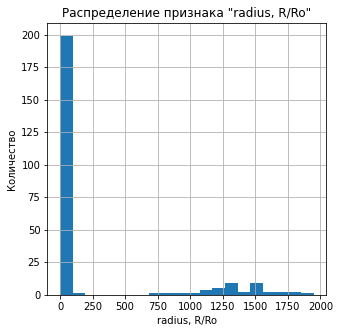

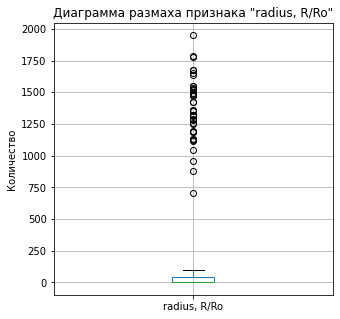

count     240.00
mean      237.16
std       517.16
min         0.01
25%         0.10
50%         0.76
75%        42.75
max      1948.50
Name: radius, R/Ro, dtype: float64


In [32]:
histogram(stars, 'radius, R/Ro')
whiskers(stars, 'radius, R/Ro')

Зная значение радиуса Солнца, можно посмотреть, сколько звёзд в выборке имеют одинаковый или меньший показатель с этой звездой:

In [33]:
print(round(stars[stars['radius, R/Ro'] < 1].shape[0] /
            stars.shape[0] * 100, 2))

52.92


Чуть больше половины звёзд из нашей выборки имеют радиус равный или меньший аналогичному для Солнца (3.828 * 10e26 Вт)

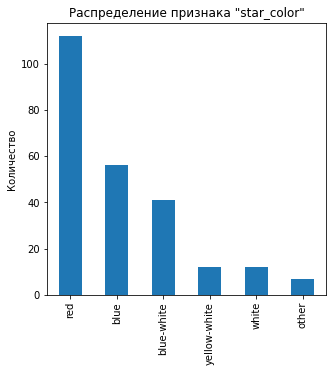

In [34]:
stars['star_color'].value_counts().plot(
    kind = 'bar',
    figsize = (5,5),
    title = 'Распределение признака "star_color"',
    ylabel = 'Количество'
);

In [35]:
print(round(stars[stars['star_color'] == 'red'].shape[0] /
            stars.shape[0] * 100, 2))

46.67


Действительно, как выяснили ранее, в основном выборка представлена звёздами красного цвета (46.67%)

Выводы по разделу:

- исследовательский анализ данных не выявил каких-то аномалий или расхождений;
- основная часть звёзд в выборке - красного цвета (46.67%), с температурой поверхности - до 3800 К (45.42%).

## Корреляционный анализ данных

Построим тепловую карту коэффициентов корреляции phik:

interval columns not set, guessing: ['temperature, K', 'luminosity, L/Lo', 'radius, R/Ro', 'absolute_magnitude, Mv', 'star_type']


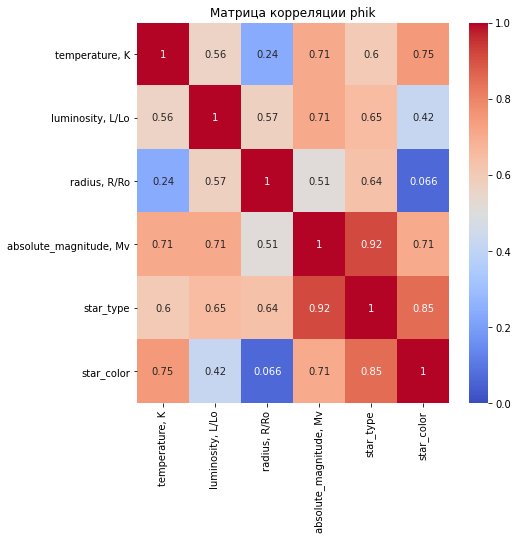

In [36]:
plt.figure(figsize=(7, 7))
sns.heatmap(stars[['temperature, K', 'luminosity, L/Lo', 'radius, R/Ro', \
                  'absolute_magnitude, Mv', 'star_type', 'star_color']] \
            .phik_matrix(), \
             annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Матрица корреляции phik')

plt.show()

Используя шкалу Чеддока, сопоставим тесноту связей между входными признаками и целевым `temperature, K` (0,1-0,3 - слабая; 0,3-0,5 - умеренная; 0,5-0,7 - заметная; 0,7-0,9 - высокая; 0,9-1 - весьма высокая):

- теснота связи с `star_color` высокая (0.75);
- теснота связи с `absolute_magnitude, Mv` заметная (0.71);
- теснота связи с `star_type` заметная (0.6);
- теснота связи с `luminosity, L/Lo` заметная (0.56);
- теснота связи с `radius, R/Ro` слабая (0.24).

Мультиколлинеарность между признаками не выявлена, однако, присутствует весьма высокая связь между признаками `star_type` и `absolute_magnitude, Mv` (0.92).

Построим диаграммы рассеяния для количественных признаков, выделив разным цветом классы звёзд:

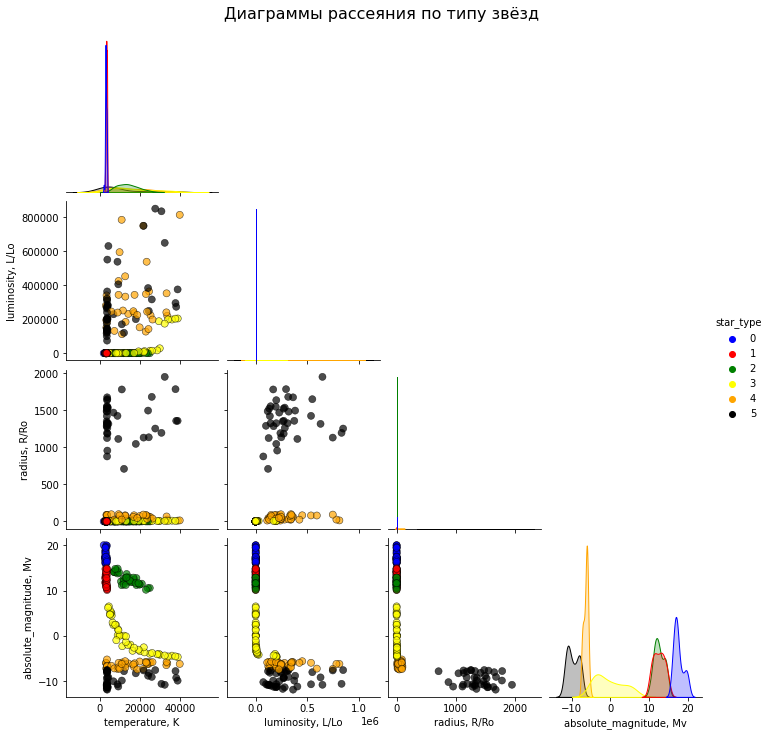

In [37]:
# разделим цветами типы звёзд (от 0 до 5): 
star_type_color_map = {
    0: 'blue',
    1: 'red',
    2: 'green',
    3: 'yellow',
    4: 'orange',
    5: 'black'
}

# список признаков, по которым строим диаграммы рассеяния
columns_to_consider = ['temperature, K', 'luminosity, L/Lo', 'radius, R/Ro', \
                       'absolute_magnitude, Mv']

# добавим столбец с новыми цветами
stars['type_color'] = stars['star_type'].map(star_type_color_map)


# используем seaborn для попарных диаграмм рассеяния с учётом цветов точек
sns.pairplot(
    stars,
    vars=columns_to_consider,
    hue='star_type',  # зависимость цвета точек от значения 'star_type'
    palette=star_type_color_map,
    markers='o',
    corner=True,  # убираем симметричные дублирующие графики
    plot_kws={'alpha': 0.7, 's': 50, 'edgecolor': 'k'}
)

plt.suptitle("Диаграммы рассеяния по типу звёзд", y=1.02, fontsize=16)
plt.show()

Наблюдается устойчивая корреляция между признаками `absolute_magnitude, Mv` и `temperature, K` для звёзд 2-го и 3-го типов (белые карлики и звёзды главной последовательности).

Выводы по разделу:

- построили тепловую карту коэффициентов корреляции phik, выявили тесноту связей целевого признака с входными: с `star_color` - высокая (0.75),`absolute_magnitude, Mv`, `star_type` и `luminosity, L/Lo` - заметная (0.71, 0.6 и 0.56, соответственно), а с `radius, R/Ro` - слабая (0.24);
- мультиколлинеарность между признаками не обнаружена;
- признаки `star_type` и `absolute_magnitude, Mv` имеют весьма высокую связь (0.92);
- наблюдается устойчивая корреляция между признаками `absolute_magnitude, Mv` и `temperature, K` для звёзд 2-го и 3-го типов (белые карлики и звёзды главной последовательности).

## Создание новых признаков

На диаграмме рассеяния Герцшпрунга-Рассела светимость откладывается в логарифмическом масштабе. Создадим новые признаки `lg_lum` и `lg_rad` (логарифмы светимости и радиуса), изучим их диаграммы и корреляцию с целевым признаком:

In [38]:
# светимость Солнца (константа)
l_0 = 3.828 * 10**26

lum_values = np.array(stars['luminosity, L/Lo'])

stars['lg_lum'] = np.log10(l_0  * lum_values)

stars.head()

,"temperature, K","luminosity, L/Lo","radius, R/Ro","absolute_magnitude, Mv",star_type,star_color,type_color,lg_lum
0,3068,0.002400,0.1700,16.12,0,red,blue,23.963183
1,3042,0.000500,0.1542,16.60,0,red,blue,23.281942
2,2600,0.000300,0.1020,18.70,0,red,blue,23.060093
3,2800,0.000200,0.1600,16.65,0,red,blue,22.884002
4,1939,0.000138,0.1030,20.06,0,red,blue,22.722851


In [39]:
# радиус Солнца (константа)
r_0 = 6.9551 * 10**8

rad_values = np.array(stars['radius, R/Ro'])

stars['lg_rad'] = np.log10(l_0  * rad_values)

stars.head()

,"temperature, K","luminosity, L/Lo","radius, R/Ro","absolute_magnitude, Mv",star_type,star_color,type_color,lg_lum,lg_rad
0,3068,0.002400,0.1700,16.12,0,red,blue,23.963183,25.813421
1,3042,0.000500,0.1542,16.60,0,red,blue,23.281942,25.771056
2,2600,0.000300,0.1020,18.70,0,red,blue,23.060093,25.591572
3,2800,0.000200,0.1600,16.65,0,red,blue,22.884002,25.787092
4,1939,0.000138,0.1030,20.06,0,red,blue,22.722851,25.595809


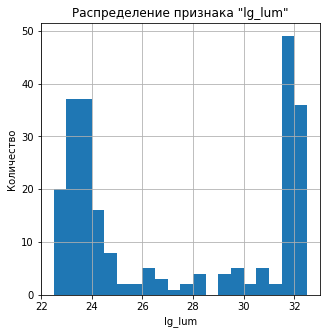

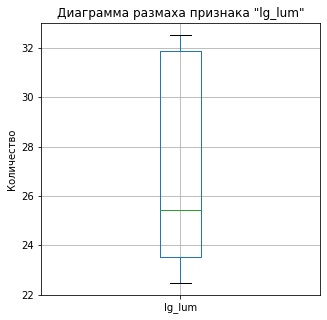

count    240.00
mean      27.29
std        3.96
min       22.49
25%       23.52
50%       25.42
75%       31.88
max       32.51
Name: lg_lum, dtype: float64


In [40]:
histogram(stars, 'lg_lum')
whiskers(stars, 'lg_lum')

Распределение приняло более нормальный вид, выбросы исчезли

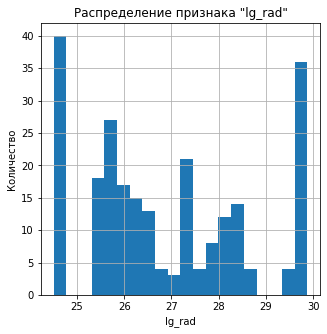

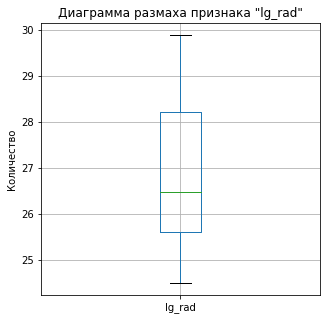

count    240.00
mean      26.89
std        1.71
min       24.51
25%       25.59
50%       26.46
75%       28.21
max       29.87
Name: lg_rad, dtype: float64


In [41]:
histogram(stars, 'lg_rad')
whiskers(stars, 'lg_rad')

Аналогичная картина для логарифма радиуса

interval columns not set, guessing: ['temperature, K', 'lg_lum', 'lg_rad']


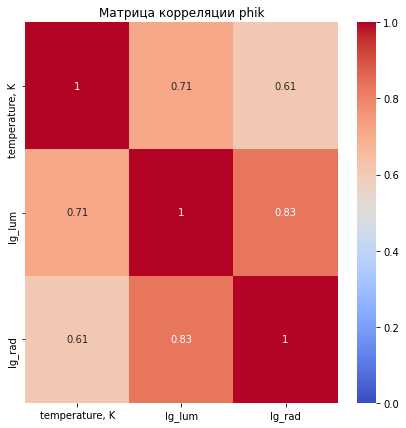

In [42]:
plt.figure(figsize=(7, 7))
sns.heatmap(stars[['temperature, K', 'lg_lum', 'lg_rad']] \
            .phik_matrix(), \
             annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Матрица корреляции phik')

plt.show()

Теснота связи с целевым признаком также "подросла":

- с `lg_lum` заметная, 0.71 против 0.56 у `luminosity, L/Lo`;
- с `lg_rad` заметная, 0.61 против 0.24 у `radius, R/Ro`.

Эти признаки будем использовать при дальнейшем обучении модели.

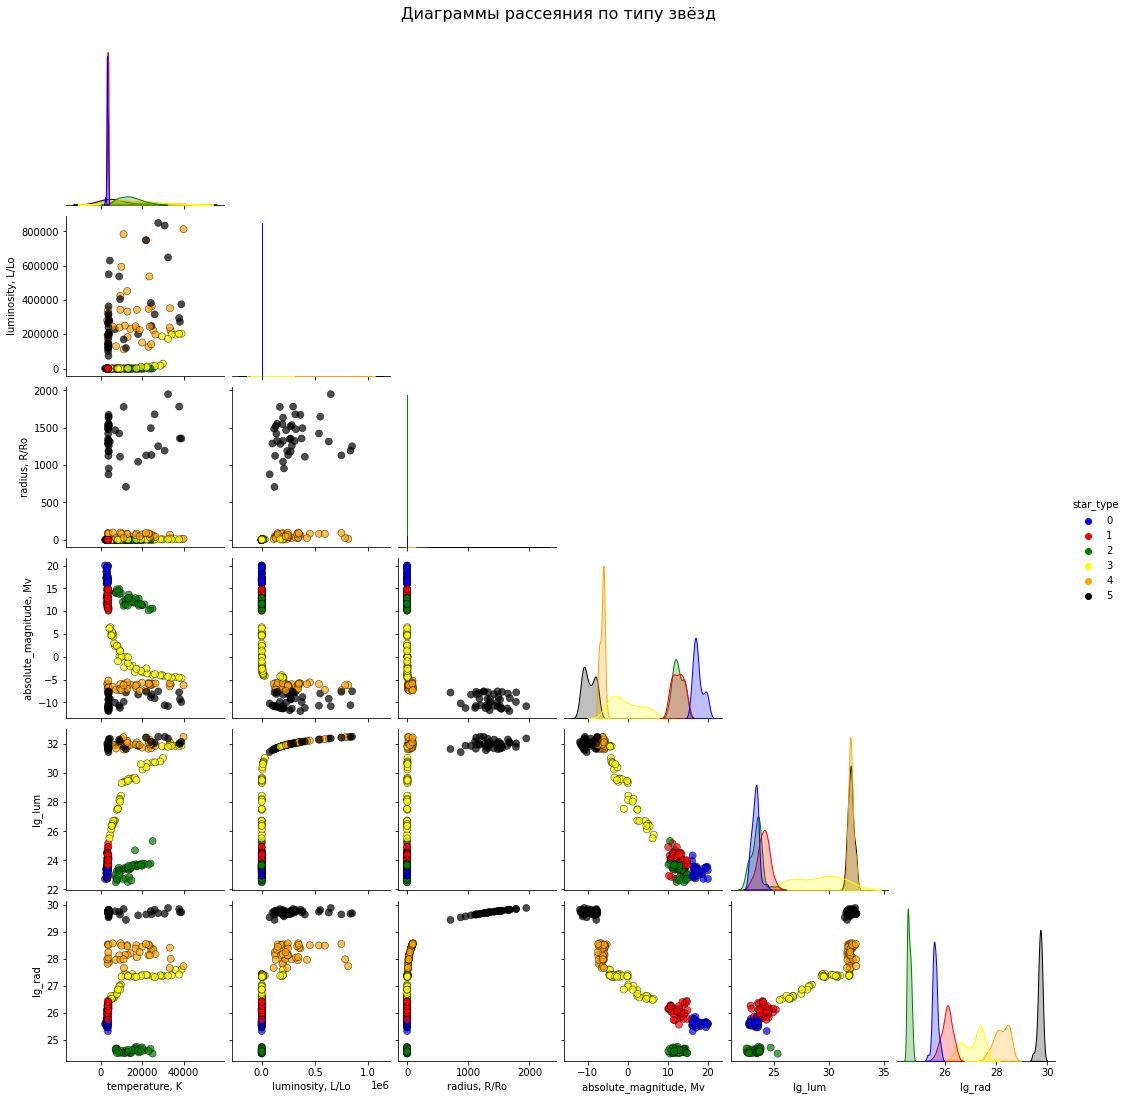

In [43]:
# список признаков, по которым строим диаграммы рассеяния
columns_to_consider = ['temperature, K', 'luminosity, L/Lo', 'radius, R/Ro', \
                       'absolute_magnitude, Mv', 'lg_lum', 'lg_rad']

# используем seaborn для попарных диаграмм рассеяния с учётом цветов точек
sns.pairplot(
    stars,
    vars=columns_to_consider,
    hue='star_type',  # зависимость цвета точек от значения 'star_type'
    palette=star_type_color_map,
    markers='o',
    corner=True,  # убираем симметричные дублирующие графики
    plot_kws={'alpha': 0.7, 's': 50, 'edgecolor': 'k'}
)

plt.suptitle("Диаграммы рассеяния по типу звёзд", y=1.02, fontsize=16)
plt.show()

После добавления новых признаков (логарифмов светимости и радиуса), выявлена корреляция между  `lg_lum` и `temperature, K` для звёзд 0-го...3-го типов (коричневые, красные, белые карлики и звёзды главной последовательности), между `lg_lum` и `absolute_magnitude, Mv`, `lg_rad` и `absolute_magnitude, Mv`, `lg_lum` и `lg_rad` для звёзд 0-го, 1-го и 3-го типов (коричневые, красные карлики и звёзды главной последовательности)

Выводы по разделу:

- создали два новых признака - логарифмы светимости `lg_lum` и радиуса `lg_rad`, взяв за основу диаграмму рассеяния Герцшпрунга-Рассела и табличные коэффициенты для Солнца;
- выбросы исчезли, распределения приняли более нормальный вид, теснота связей с целевым признаком лучше, чем у признаков-"родителей": с `lg_lum` заметная, 0.71 против 0.56 у `luminosity, L/Lo`; с `lg_rad` заметная, 0.61 против 0.24 у `radius, R/Ro`;
- дополнительно выявлена корреляция между  `lg_lum` и `temperature, K` для звёзд 0-го...3-го типов (коричневые, красные, белые карлики и звёзды главной последовательности), между `lg_lum` и `absolute_magnitude, Mv`, `lg_rad` и `absolute_magnitude, Mv`, `lg_lum` и `lg_rad` для звёзд 0-го, 1-го и 3-го типов (коричневые, красные карлики и звёзды главной последовательности);
- стоит отметить, что на графике зависимости `lg_lum` от `temperature, K` чётко видны кластеры звёзд одного типа, что соответствует диаграмме Герцшпрунга-Рассела.

## Подготовка данных к построению модели

In [44]:
# разделим на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = \
        train_test_split(stars.drop('temperature, K', axis=1),
                         stars['temperature, K'],
                         test_size = TEST_SIZE,
                         random_state = RANDOM_STATE)

In [45]:
# кодируем числовые и категориальные признаки
cat_features = ['star_type', 'star_color', 'type_color']
num_features = ['luminosity, L/Lo', 'radius, R/Ro', 'absolute_magnitude, Mv', \
               'lg_lum', 'lg_rad']

col_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), num_features),
        ('ohe', OneHotEncoder(drop='first', sparse_output=False,
                              handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough',
    n_jobs=-1
)

In [46]:
# масштабируем признаки
X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

Выводы по разделу:

- разделили датасет на тренировочную и тестовую выборки;
- провели кодирование числовых и категориальных признаков и последующее их масштабирование.

## Построение простой модели нейронной сети - baseline

In [47]:
# создадим тензоры из наших выборок
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train.values)
y_test = torch.FloatTensor(y_test.values)

In [48]:
# количество нейронов на каждом слое
n_in_neurons = X_train.shape[1]
n_hidden_neurons_1 = 12
n_hidden_neurons_2 = 8
n_out_neurons = 1

# зафиксируем случайность PyTorch
torch.manual_seed(RANDOM_STATE)

Создадим класс для задания архитектуры нейронной сети. Будем использовать два скрытых слоя, в качестве функций активации методом подбора были выбраны LeakyReLu на всех слоях. Аналогичный вариант с ReLU даёт метрику RMSE выше требуемой (4545), а применение Tahn и Sigmoid вообще не меняют метрику (13390 на всех эпохах).

In [49]:
class BaseLine(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, \
                  n_hidden_neurons_2, n_out_neurons):
        super(BaseLine, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.ac1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.ac2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)
        self.ac3 = nn.LeakyReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.ac3(x)
        return x

# инициализируем нейросеть
net = BaseLine(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, \
               n_out_neurons)

Создадим функцию обучения модели, применим L1- и L2-регуляризации весов:

In [50]:
# оптимизатор
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
# функция потерь
loss = nn.MSELoss()

def model_train(x_train, y_train):
    net.train()
    optimizer.zero_grad()
    preds = net.forward(x_train).flatten()
    mse_loss = loss(preds, y_train)

    # добавляем одновременно l1- и l2-регуляризации весов
    l1_lambda = 0.005
    l1_norm = sum(p.abs().sum() for p in net.parameters())
    l2_lambda = 0.01
    l2_norm = sum(p.pow(2.0).sum() for p in net.parameters())
    result_loss = mse_loss + l1_lambda * l1_norm + l2_lambda * l2_norm
    result_loss.backward()

    # обновляем веса
    optimizer.step()

Создадим функцию тестирования модели:

In [51]:
def model_test(epoch):
    # переводим модель в режим тестирования
    net.eval()
    # получаем предсказания
    test_preds = net.forward(X_test).flatten()
    print('Epoch number: ', epoch)
    print('RMSE = ', torch.sqrt(loss(test_preds, y_test)).item(), '\n')
    return test_preds

теперь создадим функцию для Кайминг-инициализации весов:

In [52]:
def init_weights(layer):
    if type(layer) == nn.Linear:
        nn.init.kaiming_uniform_(
            layer.weight,
            mode='fan_in',
            nonlinearity='relu'
        )

# применим инициализацию ко всем слоям
net.apply(init_weights)

BaseLine(
  (fc1): Linear(in_features=20, out_features=12, bias=True)
  (ac1): LeakyReLU(negative_slope=0.01)
  (fc2): Linear(in_features=12, out_features=8, bias=True)
  (ac2): LeakyReLU(negative_slope=0.01)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
  (ac3): LeakyReLU(negative_slope=0.01)
)

In [53]:
# создадим функцию для отображения графика "Факт-прогноз"
def show_graph(y_pred):
    
    basic_df = y_test
    nn_df = y_pred

    plt.figure(figsize=(10, 7))
    plt.bar(range(len(nn_df)), nn_df.detach().numpy(), \
            color='orange', label='Прогноз')
    plt.bar(range(len(basic_df)), basic_df, color='lightblue', width=0.4,
            label='Факт')

    plt.legend()
    plt.title('Факт-прогноз', fontsize=10)
    plt.xlabel('Номер звезды в таблице данных', fontsize=10)
    plt.ylabel('Температура звезды, К', fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

Обучим нейросеть:

In [54]:
best_rmse_baseline = float('inf') # задаём мин. значение RMSE как бесконечность
num_epochs = 15000

for epoch in range(num_epochs):
    model_train(X_train, y_train)
    if epoch % 1000 == 0:
        baseline_preds = model_test(epoch)
        current_rmse = torch.sqrt(loss(baseline_preds, y_test)).item()
        if current_rmse < best_rmse_baseline:
            best_rmse_baseline = current_rmse

Epoch number:  0
RMSE =  13390.486328125 

Epoch number:  1000
RMSE =  11620.25 

Epoch number:  2000
RMSE =  7512.27392578125 

Epoch number:  3000
RMSE =  6131.95703125 

Epoch number:  4000
RMSE =  5682.74609375 

Epoch number:  5000
RMSE =  5305.74951171875 

Epoch number:  6000
RMSE =  4960.5810546875 

Epoch number:  7000
RMSE =  4661.169921875 

Epoch number:  8000
RMSE =  4510.1669921875 

Epoch number:  9000
RMSE =  4460.9072265625 

Epoch number:  10000
RMSE =  4402.45458984375 

Epoch number:  11000
RMSE =  4476.43212890625 

Epoch number:  12000
RMSE =  4555.83349609375 

Epoch number:  13000
RMSE =  4659.3681640625 

Epoch number:  14000
RMSE =  4774.27001953125 



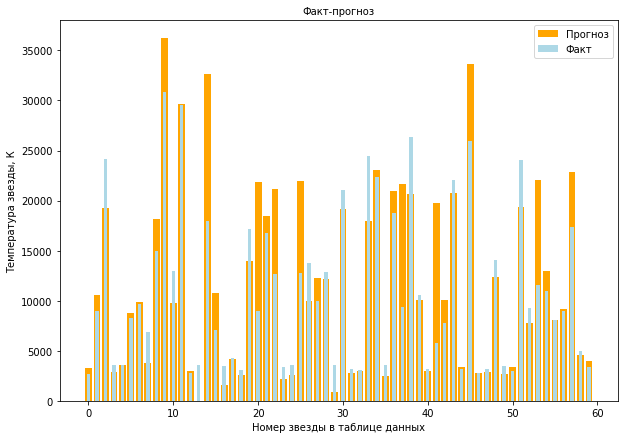

In [55]:
show_graph(baseline_preds)

Выводы по разделу:

- создали класс для задания архитектуры простой нейросети. Использовали два скрытых слоя, в качестве функций активации на каждом из них путём подбора были выбраны LeakyReLu;
- создали функцию обучения модели, применили в ней одновременно L1- и L2-регуляризации весов;
- создали функцию для Кайминг-инициализации весов с параметрами `mode='fan_in'`, `nonlinearity='relu'`;
- создали функцию для отображения графика "факт-прогноз", где по горизонтальной оси отложены условные номера звёзд, а по вертикальной — температура в Кельвинах;
- обучили созданную нейросеть, задав количество эпох = 15000 с шагом 1000, в результате получили значение искомой метрики RMSE = 4402, что удовлетворяет условиям задачи (<= 4500);
- прогнозная температура звёзд №№ 14, 20, 22, 25, 37, 41, 45 и 53 заметно выше фактической, в остальном модель показывает себя неплохо.

## Улучшение нейросети

Создадим решение с перебором параметров нейросети. Список параметров для перебора будет включать техники регуляризации `dropout` и `batch normalization`. Архитектуру нейронной сети: количество слоёв, нейронов, вид функции активации оставим как в Baseline, чтобы сравнить результат.

Создадим сначала класс-наследник для регуляризации `Dropout`:

In [56]:
class Dropout_nn(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, \
                  n_hidden_neurons_2, n_out_neurons):
        super(Dropout_nn, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.dp1 = nn.Dropout(p=0.1)
        self.ac1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.dp2 = nn.Dropout(p=0.3)
        self.ac2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)
        self.ac3 = nn.LeakyReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.dp1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.dp2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.ac3(x)
        return x

# инициализируем нейросеть
net = Dropout_nn(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, \
               n_out_neurons)

In [57]:
# применим инициализацию ко всем слоям
net.apply(init_weights)

Dropout_nn(
  (fc1): Linear(in_features=20, out_features=12, bias=True)
  (dp1): Dropout(p=0.1, inplace=False)
  (ac1): LeakyReLU(negative_slope=0.01)
  (fc2): Linear(in_features=12, out_features=8, bias=True)
  (dp2): Dropout(p=0.3, inplace=False)
  (ac2): LeakyReLU(negative_slope=0.01)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
  (ac3): LeakyReLU(negative_slope=0.01)
)

In [58]:
# оптимизатор
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

In [59]:
best_rmse_dropout = float('inf')
num_epochs = 17000

for epoch in range(num_epochs):
    model_train(X_train, y_train)
    if epoch % 1000 == 0:
        dropout_preds = model_test(epoch)
        current_rmse = torch.sqrt(loss(dropout_preds, y_test)).item()
        if current_rmse < best_rmse_dropout:
            best_rmse_dropout = current_rmse

Epoch number:  0
RMSE =  13390.8466796875 

Epoch number:  1000
RMSE =  11728.6162109375 

Epoch number:  2000
RMSE =  7398.93603515625 

Epoch number:  3000
RMSE =  6059.8876953125 

Epoch number:  4000
RMSE =  5675.49853515625 

Epoch number:  5000
RMSE =  5323.607421875 

Epoch number:  6000
RMSE =  5027.02978515625 

Epoch number:  7000
RMSE =  4723.1162109375 

Epoch number:  8000
RMSE =  4472.9169921875 

Epoch number:  9000
RMSE =  4311.40380859375 

Epoch number:  10000
RMSE =  4202.2529296875 

Epoch number:  11000
RMSE =  4130.224609375 

Epoch number:  12000
RMSE =  4098.00830078125 

Epoch number:  13000
RMSE =  4054.0390625 

Epoch number:  14000
RMSE =  4119.2607421875 

Epoch number:  15000
RMSE =  4131.67529296875 

Epoch number:  16000
RMSE =  4179.2353515625 



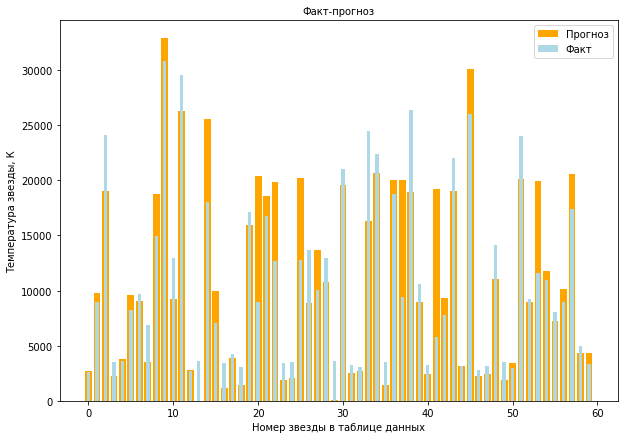

In [60]:
show_graph(dropout_preds)

При помощи метода регуляризации `Dropout` удалось достичь улучшения метрики RMSE, теперь она составляет 4054 против 4402 для Baseline. Количество звёзд с более высокой прогнозной температурой, чем фактической сократилось, сейчас можно выделить №№ 14, 20, 37, 41 и 53. По остальным звёздам тоже можно увидеть более сбалансированную картину, чем была на модели `Baseline`.

Посмотрим, как с задачей справится метод регуляризации `Batch Normalization`. Аналогично, создадим класс-наследник:

In [61]:
class Batch_nn(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, \
                  n_hidden_neurons_2, n_out_neurons):
        super(Batch_nn, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.bn1 = nn.BatchNorm1d(n_hidden_neurons_1)
        #self.dp1 = nn.Dropout(p=0.2)
        self.ac1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.bn2 = nn.BatchNorm1d(n_hidden_neurons_2)
        self.ac2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)
        self.ac3 = nn.LeakyReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.ac1(x)
        #x = self.dp1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.ac3(x)
        return x

# инициализируем нейросеть
net = Batch_nn(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, \
               n_out_neurons)

In [62]:
# применим инициализацию ко всем слоям
net.apply(init_weights)

Batch_nn(
  (fc1): Linear(in_features=20, out_features=12, bias=True)
  (bn1): BatchNorm1d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (ac1): LeakyReLU(negative_slope=0.01)
  (fc2): Linear(in_features=12, out_features=8, bias=True)
  (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (ac2): LeakyReLU(negative_slope=0.01)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
  (ac3): LeakyReLU(negative_slope=0.01)
)

In [63]:
# оптимизатор
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

In [64]:
best_rmse_batch = float('inf')
num_epochs = 30000

for epoch in range(num_epochs):
    model_train(X_train, y_train)
    if epoch % 3000 == 0:
        batch_preds = model_test(epoch)
        current_rmse = torch.sqrt(loss(batch_preds, y_test)).item()
        if current_rmse < best_rmse_batch:
            best_rmse_batch = current_rmse

Epoch number:  0
RMSE =  13390.8916015625 

Epoch number:  3000
RMSE =  13212.5029296875 

Epoch number:  6000
RMSE =  12752.7099609375 

Epoch number:  9000
RMSE =  12169.556640625 

Epoch number:  12000
RMSE =  11310.6796875 

Epoch number:  15000
RMSE =  10436.158203125 

Epoch number:  18000
RMSE =  9344.3466796875 

Epoch number:  21000
RMSE =  8940.25 

Epoch number:  24000
RMSE =  8769.6552734375 

Epoch number:  27000
RMSE =  9952.3515625 



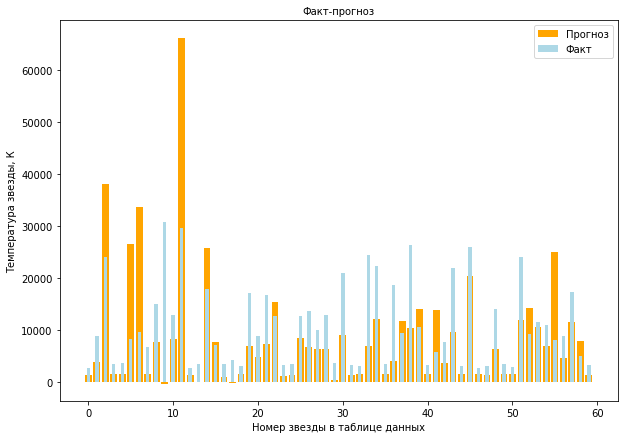

In [65]:
show_graph(batch_preds)

Попытки "подтянуть" RMSE за счёт изменения количества эпох и их шага, добавления параметра `weight_decay`, исключения слоёв, изменения `learning rate` не возымели должного эффекта - минимальное значение до переобучения модели составило 8769. В основном модель показала сильно заниженные прогнозы температуры относительно их реальных значений, за исключением нескольких звёзд №№ 2, 5, 6, 11, 55), где ситуация ровно противоположная. Возможно, причина в том, что `Batch Normalization` должен хорошо себя показывать на больших нейронных сетях (десятки слоёв), а для маленьких лучше подходит `Dropout`.

Оформим полученные данные в виде таблицы:

In [66]:
data = {
    'Model': ['Baseline', 'Dropout', 'Batch'],
    'RMSE': [best_rmse_baseline, best_rmse_dropout, best_rmse_batch]
}
display(pd.DataFrame(data))

,Model,RMSE
0,Baseline,4402.454590
1,Dropout,4054.039062
2,Batch,8769.655273


Выводы по разделу:

- создали класс-наследник для регуляризации `Dropout` Архитектуру нейронной сети: количество слоёв, нейронов, вид функций активации оставили такими же, как в BaseLine;
- обучили нейросеть, в результате получили значение искомой метрики RMSE = 4054, что во-первых, удовлетворяет условиям задачи (<= 4500), во-вторых, является лучшим показателем, чем в модели BaseLine;
- создали класс-наследник для регуляризации `Batch Normalization`. Архитектуру нейронной сети: количество слоёв, нейронов, вид функций активации оставили такими же, как в BaseLine;
- обучили нейросеть, метрика RMSE так и не смогла приблизиться к требуемому значению 4500, достигнул минимума в 8769. Вероятная причина - нейронная сеть недостаточно большая.

## Отчёт по исследованию

Для решения задачи прогнозирования температуры звезды, были проделаны следующие этапы исследования:

- загрузка и предобработка данных:
  - считали данные из датасета, привели названия столбцов к единому виду (snake_case, строчные буквы);
  - удалили столбец `Unnamed`, дублирующий индексы;
  - пропущенные значения и явные дубликаты отсутствуют;
  - обнаружили одинаковые цвета звёзд, записанные по-разному, привели их к единому виду.

- исследовательский анализ данных:
  - основная часть звёзд в выборке - красного цвета (46.67%), с температурой поверхности - до 3800 К (45.42%).

- корреляционный анализ данных и feature engineering:
  - построили тепловую карту коэффициентов корреляции phik, выявили тесноту связей целевого признака с входными: с `star_color` - высокая (0.75),`absolute_magnitude, Mv`, `star_type` и `luminosity, L/Lo` - заметная (0.71, 0.6 и 0.56, соответственно), а с `radius, R/Ro` - слабая (0.24);
  - мультиколлинеарность между признаками не обнаружена;
  - признаки `star_type` и `absolute_magnitude, Mv` имеют весьма высокую связь (0.92);
  - наблюдается устойчивая корреляция между признаками `absolute_magnitude, Mv` и `temperature, K` для звёзд 2-го и 3-го типов (белые карлики и звёзды главной последовательности);
  - создали два новых признака - логарифмы светимости `lg_lum` и радиуса `lg_rad`, взяв за основу диаграмму рассеяния Герцшпрунга-Рассела и табличные коэффициенты для Солнца. Выбросы исчезли, распределения приняли более нормальный вид, теснота связей с целевым признаком лучше, чем у признаков-"родителей": с `lg_lum` заметная, 0.71 против 0.56 у `luminosity, L/Lo`; с `lg_rad` заметная, 0.61 против 0.24 у `radius, R/Ro`. Дополнительно выявлена корреляция между `lg_lum` и `temperature, K` для звёзд 0-го...3-го типов (коричневые, красные, белые карлики и звёзды главной последовательности), между `lg_lum` и `absolute_magnitude, Mv`, `lg_rad` и `absolute_magnitude, Mv`, `lg_lum` и `lg_rad` для звёзд 0-го, 1-го и 3-го типов (коричневые, красные карлики и звёзды главной последовательности). На графике зависимости `lg_lum` от `temperature, K` чётко видны кластеры звёзд одного типа, что соответствует диаграмме Герцшпрунга-Рассела;

- подготовка данных к построению простой модели нейронной сети baseline:
  - разделили датасет на тренировочную и тестовую выборки, провели кодирование числовых и категориальных признаков и последующее их масштабирование;
  - создали класс для задания архитектуры простой нейросети. Использовали два скрытых слоя, в качестве функций активации на каждом из них путём подбора были выбраны LeakyReLu;
  - создали функцию обучения модели, применили в ней одновременно L1- и L2-регуляризации весов;
  - создали функцию для Кайминг-инициализации весов с параметрами `mode='fan_in'`, `nonlinearity='relu'`;
  - создали функцию для отображения графика "факт-прогноз", где по горизонтальной оси отложены условные номера звёзд, а по вертикальной — температура в Кельвинах;
  - обучили созданную нейросеть, задав количество эпох = 15000 с шагом 1000, в результате получили значение искомой метрики RMSE = 4402, что удовлетворяет условиям задачи (<= 4500);
  - прогнозная температура звёзд №№ 14, 20, 22, 25, 37, 41, 45 и 53 заметно выше фактической, в остальном модель показывает себя неплохо;

- улучшение нейросети:
  - создали класс-наследник для регуляризации `Dropout` Архитектуру нейронной сети: количество слоёв, нейронов, вид функций активации оставили такими же, как в BaseLine;
  - обучили нейросеть, в результате получили значение искомой метрики RMSE = 4054, что во-первых, удовлетворяет условиям задачи (<= 4500), во-вторых, является лучшим показателем, чем в модели BaseLine;
  - количество звёзд с более высокой прогнозной температурой, чем фактической сократилось, сейчас можно выделить №№ 14, 20, 37, 41 и 53. По остальным звёздам тоже можно увидеть более сбалансированную картину, чем была на модели `Baseline`;
  - создали класс-наследник для регуляризации `Batch Normalization`. Архитектуру нейронной сети: количество слоёв, нейронов, вид функций активации оставили такими же, как в BaseLine;
  - обучили нейросеть, метрику RMSE не получилось приблизить к требуемому значению 4500, достигли минимума в 8769. Вероятная причина - нейронная сеть недостаточно большая;
  - в основном модель показала сильно заниженные прогнозы температуры относительно их реальных значений, за исключением нескольких звёзд №№ 2, 5, 6, 11, 55), где ситуация ровно противоположная.

Рекомендация для Заказчика (обсерватории "Небо на ладони") - использовать нейронную сеть с регуляризацией `Dropout`, которая улучшила базовую модель, достигнув значения RMSE = 4054.